# EDA Notebook V3 - With merged dataset
## Notes - Feb 16th 08:00 AM PST

This notebook uses a **merged version** of the SPSS file. The follwing changes were made:

From Selene : 

I did some more [data cleaning](https://7z4vtvpqcoxouiu.studio.us-west-2.sagemaker.aws/jupyterlab/default/lab/tree/RTC%3AData_merging.ipynb) (this is Selenes Data Cleaning Notebook moved to our Server) for the student dataset and school dataset

- Recoded all valid skip / not applicable / invalid / no response to NaN
- Looked at the codebook for each variable and checked if there were any other values that should be recoded as NaN (or another value)
- One-hot encoded all the categorical variables
- Deleted students from 4 groups that are not nationally representative
- Changed the country names to full country names (instead of 3 letter codes)
- Merged the student dataset and school dataset

Note that I didn't merge in the Teacher dataset because there is no way to match each student with a teacher. (We know which school each student went to, but if there are multiple teachers in that school, we can't match each student to a teacher.)

- More details are in the following folder: https://drive.google.com/drive/u/0/folders/1LsSvVuqH5oWC4f8c59fj1taEvATuvdoj
- Details on data cleaning steps: "Data cleaning steps"
- Python notebook I used for data cleaning:  "Data cleaning steps.ipynb" (I did everything in Colab)
- List of variables in the final cleaned dataset
- Final cleaned dataset:  "PISA_cleaned_dataset.csv"

# File Descriptions

These files

 - **pisa-2022-182var-recoded-02102025.csv_local.csv**
    - This is Mick's new main data file with the MATH_Proficient variable and 180 other variables
 - **PISA 2022 - CSV - DD - Sheet1.csv**
    - This is a data dictionary of the fields

# Pick Specific Columns or Read the Whole File?

In [1]:
columns_to_read_full = [
    "MATH_Proficient", "CNT", "CNTRYID", "CNTSCHID", "CNTSTUID", "SISCO", "ST347Q01JA", "ST347Q02JA",
    "ST349Q01JA", "ST350Q01JA", "ST356Q01JA", "ST322Q01JA", "ST322Q02JA", "ST322Q03JA", "ST322Q04JA",
    "ST322Q06JA", "ST322Q07JA", "DURECEC", "EFFORT1", "EFFORT2", "ST259Q01JA", "WB164Q01HA", "HOMEPOS",
    "ST004D01T", "GRADE", "REPEAT", "EXPECEDU", "ICTAVSCH", "ICTAVHOM", "ICTDISTR", "IMMIG", "LANGN",
    "TARDYSD", "ST226Q01JA", "ST016Q01NA", "MISSSC", "Option_UH", "OECD", "PAREDINT", "BMMJ1", "BFMJ2",
    "WB163Q06HA", "WB163Q07HA", "ST230Q01JA", "SKIPPING", "IC180Q01JA", "IC180Q08JA", "ST059Q02JA",
    "ST296Q04JA", "WB176Q01HA", "STUDYHMW", "IC184Q01JA", "IC184Q02JA", "IC184Q03JA", "IC184Q04JA",
    "ST059Q01TA", "ST296Q01JA", "ST272Q01JA", "ST268Q01JA", "ST268Q04JA", "ST268Q07JA", "ST293Q04JA",
    "ST297Q01JA", "ST297Q03JA", "ST297Q05JA", "ST297Q06JA", "ST297Q07JA", "ST297Q09JA", "WB165Q01HA",
    "WB166Q01HA", "WB166Q02HA", "WB166Q03HA", "WB166Q04HA", "ST258Q01JA", "ST294Q01JA", "ST295Q01JA",
    "WB150Q01HA", "WB156Q01HA", "WB158Q01HA", "WB160Q01HA", "WB161Q01HA", "WB171Q01HA", "WB171Q02HA",
    "WB171Q03HA", "WB171Q04HA", "WB172Q01HA", "WB173Q01HA", "WB173Q02HA", "WB173Q03HA", "WB173Q04HA",
    "WB177Q01HA", "WB177Q02HA", "WB177Q03HA", "WB177Q04HA", "WB032Q01NA", "WB032Q02NA", "WB031Q01NA",
    "EXERPRAC", "STUBMI", "RELATST", "BELONG", "BULLIED", "FEELSAFE", "SCHRISK", "PERSEVAGR", "CURIOAGR",
    "COOPAGR", "EMPATAGR", "ASSERAGR", "STRESAGR", "EMOCOAGR", "GROSAGR", "INFOSEEK", "FAMSUP", "DISCLIM",
    "TEACHSUP", "COGACRCO", "COGACMCO", "EXPOFA", "EXPO21ST", "MATHEFF", "MATHEF21", "FAMCON", "ANXMAT",
    "MATHPERS", "CREATEFF", "CREATSCH", "CREATFAM", "CREATAS", "CREATOOS", "CREATOP", "OPENART", "IMAGINE",
    "SCHSUST", "LEARRES", "PROBSELF", "FAMSUPSL", "FEELLAH", "SDLEFF", "ICTRES", "ESCS", "FLSCHOOL",
    "FLMULTSB", "FLFAMILY", "ACCESSFP", "FLCONFIN", "FLCONICT", "ACCESSFA", "ATTCONFM", "FRINFLFM",
    "ICTSCH", "ICTHOME", "ICTQUAL", "ICTSUBJ", "ICTENQ", "ICTFEED", "ICTOUT", "ICTWKDY", "ICTWKEND",
    "ICTREG", "ICTINFO", "ICTEFFIC", "BODYIMA", "SOCONPA", "LIFESAT", "PSYCHSYM", "SOCCON", "EXPWB",
    "CURSUPP", "PQMIMP", "PQMCAR", "PARINVOL", "PQSCHOOL", "PASCHPOL", "ATTIMMP", "CREATHME", "CREATACT",
    "CREATOPN", "CREATOR", "WORKPAY", "WORKHOME"
]

columns_to_read_test = [
    "MATH_Proficient", "CNT", "CNTRYID", "CNTSCHID", "CNTSTUID", "SISCO", "WB031Q01NA"
]

columns_to_read_just_wle = [
    "MATH_Proficient", "CNT", "CNTRYID", "CNTSCHID", "CNTSTUID", "SISCO",
    "EXERPRAC", "STUBMI", "RELATST", "BELONG", "BULLIED", "FEELSAFE", "SCHRISK", "PERSEVAGR", "CURIOAGR",
    "COOPAGR", "EMPATAGR", "ASSERAGR", "STRESAGR", "EMOCOAGR", "GROSAGR", "INFOSEEK", "FAMSUP", "DISCLIM",
    "TEACHSUP", "COGACRCO", "COGACMCO", "EXPOFA", "EXPO21ST", "MATHEFF", "MATHEF21", "FAMCON", "ANXMAT",
    "MATHPERS", "CREATEFF", "CREATSCH", "CREATFAM", "CREATAS", "CREATOOS", "CREATOP", "OPENART", "IMAGINE",
    "SCHSUST", "LEARRES", "PROBSELF", "FAMSUPSL", "FEELLAH", "SDLEFF", "ICTRES", "ESCS", "FLSCHOOL",
    "FLMULTSB", "FLFAMILY", "ACCESSFP", "FLCONFIN", "FLCONICT", "ACCESSFA", "ATTCONFM", "FRINFLFM",
    "ICTSCH", "ICTHOME", "ICTQUAL", "ICTSUBJ", "ICTENQ", "ICTFEED", "ICTOUT", "ICTWKDY", "ICTWKEND",
    "ICTREG", "ICTINFO", "ICTEFFIC", "BODYIMA", "SOCONPA", "LIFESAT", "PSYCHSYM", "SOCCON", "EXPWB",
    "CURSUPP", "PQMIMP", "PQMCAR", "PARINVOL", "PQSCHOOL", "PASCHPOL", "ATTIMMP", "CREATHME", "CREATACT",
    "CREATOPN", "CREATOR", "WORKPAY", "WORKHOME"
]

# Read specific columns
columns_to_read = columns_to_read_full

#Passing usecols=None explicitly tells Pandas to read all columns.
columns_to_read = None

# Read CSV

In [2]:
import boto3
import pandas as pd
import os
import numpy as np

# Define local file path
local_file_path = "PISA_cleaned_dataset.csv"  # Change as needed

# Define S3 details
bucket_name = "sagemaker-us-west-2-986030204467"
file_key = "capstone/testfiles/PISA_cleaned_dataset.csv"

# AWS credentials are usually stored in ~/.aws/credentials or IAM roles (if running on AWS services)
s3_client = boto3.client("s3")

# Read the file from S3
response = s3_client.get_object(Bucket=bucket_name, Key=file_key)


# Check if the file exists locally
if os.path.exists(local_file_path):
    print("📂 Loading data from local file...")
    df = pd.read_csv(local_file_path, usecols=columns_to_read)
else:
    print("☁️ Downloading data from S3...")
    
    # Create S3 client
    s3_client = boto3.client("s3")

    # Download the file from S3
    response = s3_client.get_object(Bucket=bucket_name, Key=file_key)

    # Read the file into pandas DataFrame
    df = pd.read_csv(response["Body"], usecols=columns_to_read)

    # Save a local copy for future use
    df.to_csv(local_file_path, index=False)
    print(f"✅ File saved locally as {local_file_path}")

# Display first few rows
df.head()

📂 Loading data from local file...


,CNT,CNTSCHID,CNTSTUID,MATH_Proficient,SISCO,ST347Q01JA,ST347Q02JA,ST349Q01JA_0,ST349Q01JA_1,ST349Q01JA_2,...,LANGN_912,LANGN_913,LANGN_914,LANGN_916,LANGN_917,LANGN_918,LANGN_919,LANGN_920,LANGN_921,LANGN_922
0,Albania,800282,800001,0,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,800115,800002,0,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albania,800242,800003,0,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albania,800245,800005,0,1.0,6.0,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Albania,800285,800006,1,1.0,4.0,6.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Load Data Dictionary

In [3]:
# Load the metadata file
file_key = "capstone/testfiles/PISA 2022 - CSV - DD - Sheet1.csv"  # e.g., "datasets/mydata.csv"

# Read the file from S3
response = s3_client.get_object(Bucket=bucket_name, Key=file_key)

df_metadata = pd.read_csv(response["Body"], usecols=[0, 4], names=["Field_ID", "Field_Description"], header=0)

# Display first few rows to verify
print(df_metadata.head())

# Convert to dictionary for quick lookup
field_description_lookup = df_metadata.set_index("Field_ID")["Field_Description"].to_dict()

   Field_ID                                  Field_Description
0       CNT                           Country code 3-character
1   CNTRYID                                 Country Identifier
2  CNTSCHID                                    Intl. School ID
3  CNTSTUID                                   Intl. Student ID
4       CYC  PISA Assessment Cycle (2 digits + 2 character ...


# Check Invalid Value Rate Before Cleaning

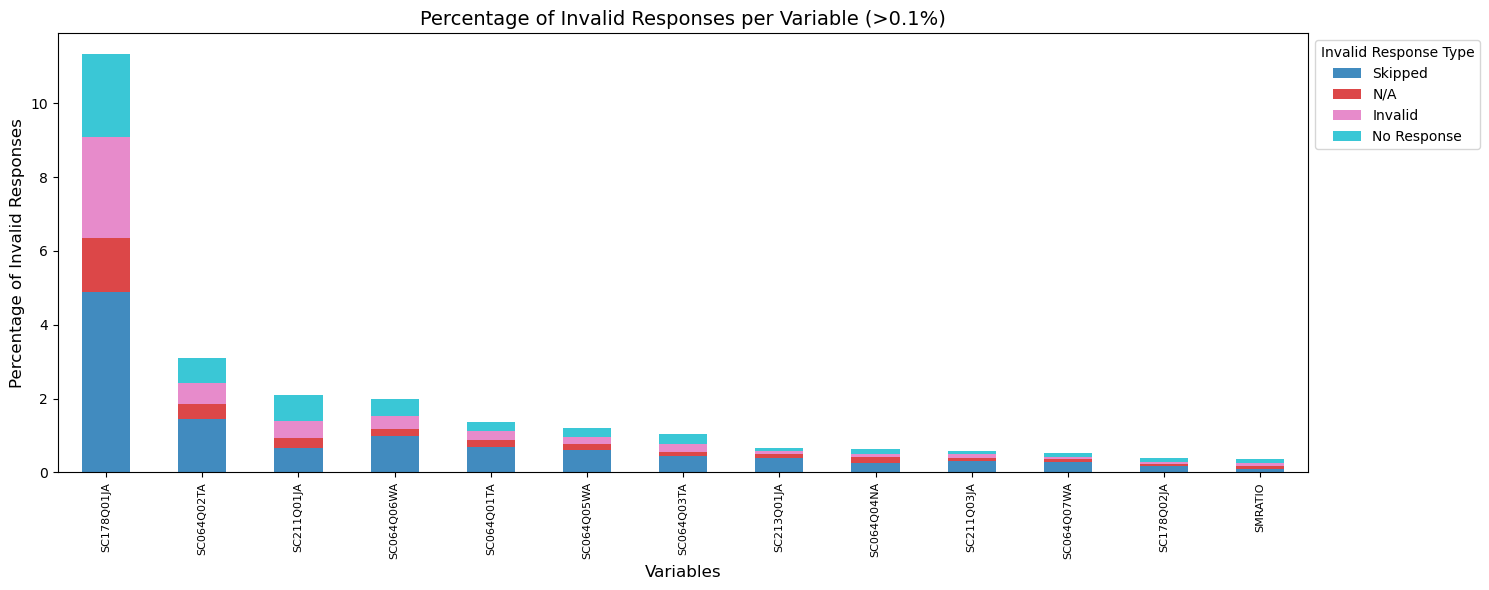

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Define invalid values with their descriptions
invalid_values = {95: "Skipped", 97: "N/A", 98: "Invalid", 99: "No Response"}

# Calculate the percentage of each invalid value per column
invalid_counts = {desc: (df == val).mean() * 100 for val, desc in invalid_values.items()}

# Convert to DataFrame for plotting
invalid_df = pd.DataFrame(invalid_counts)

# Filter out columns where all invalid percentages are below 0.1%
invalid_df = invalid_df.loc[(invalid_df > 0.1).any(axis=1)]

# Proceed only if filtered data is not empty
if not invalid_df.empty:
    # Sort by total invalid percentage (descending)
    invalid_df["Total Invalid %"] = invalid_df.sum(axis=1)
    invalid_df = invalid_df.sort_values(by="Total Invalid %", ascending=False)

    # Plot stacked bar chart
    invalid_df.drop(columns=["Total Invalid %"]).plot(kind='bar', stacked=True, figsize=(15, 6), colormap="tab10", alpha=0.85)

    # Formatting
    plt.xlabel("Variables", fontsize=12)
    plt.ylabel("Percentage of Invalid Responses", fontsize=12)
    plt.title("Percentage of Invalid Responses per Variable (>0.1%)", fontsize=14)
    plt.xticks(rotation=90, fontsize=8)
    plt.legend(title="Invalid Response Type", bbox_to_anchor=(1, 1), loc="upper left")

    plt.tight_layout()
    plt.show()
else:
    print("No variables have invalid values above 0.1%.")


# Data Check Before Cleaning

In [5]:
# Count unique values including NaNs
value_counts_table = df['WB031Q01NA'].value_counts(ascending=True, dropna=False).reset_index()

# Rename columns for clarity
value_counts_table.columns = ['Value', 'Count']

print("📊 Sorted Value Counts in 'WB031Q01NA':")
print(value_counts_table)

📊 Sorted Value Counts in 'WB031Q01NA':
   Value   Count
0    7.0     961
1    8.0    2274
2    5.0    5479
3    6.0    6202
4    4.0    9527
5    1.0    9678
6    2.0   34540
7    3.0   35928
8    NaN  487268


# Clean Invalid Values

This cleans the following invalid values from the dataset and turns them to nulls

## Exact matches of numbers on ANY column:

- 95 or 95.0000 or 995.00 or 9995.00 or 9999995.0000 (Valid Skip)
- 97 or 97.0000 or 997.00 or 9997.00 or 9999997.0000 (Not Applicable)
- 98 or 98.0000 or 998.00 or 9998.00 or 9999998.0000 (Invalid)
- 99 or 99.0000 or 999.00 or 9999.00 or 9999999.0000 (No Response)
- -999 (System Missing recoded to a negative number)

## Column specific matches

- SISCO, recode 5,7,8,9 to NaN
- ST004D01T, recode 5,7,8,9 to NaN
- REPEAT, recode 5,7,8,9 to NaN
- ST322Q01JA, recode 6 to NaN
- ST322Q02JA, recode 6 to NaN
- ST322Q03JA, recode 6 to NaN
- ST322Q04JA, recode 6 to NaN
- ST322Q06JA, recode 6 to NaN
- ST322Q07JA, recode 6 to NaN

In [6]:
# Define the cleaning function
def clean_dataset(df):
    """
    Cleans invalid values in the dataset by converting specified values to NaN.

    Parameters:
    df (pd.DataFrame): The input dataset to be cleaned.

    Returns:
    pd.DataFrame: The cleaned dataset.
    """
    # Define general invalid values to be replaced with NaN
    invalid_values = {
        95, 95.0000, 995.00, 9995.00, 9999995.0000,  # Valid Skip
        97, 97.0000, 997.00, 9997.00, 9999997.0000,  # Not Applicable
        98, 98.0000, 998.00, 9998.00, 9999998.0000,  # Invalid
        99, 99.0000, 999.00, 9999.00, 9999999.0000,  # No Response
        -999  # System Missing recoded to a negative number
    }

    # Convert all numeric columns to float (if they are not already)
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        df[col] = df[col].astype(float)  # Ensures comparisons work properly

    # Apply general invalid value replacement across all columns
    df = df.replace(invalid_values, np.nan)

    # Define column-specific recoding
    column_specific_invalids = {
        "SISCO": [5, 7, 8, 9],
        "ST004D01T": [5, 7, 8, 9],
        "REPEAT": [5, 7, 8, 9],
        "ST322Q01JA": [6],
        "ST322Q02JA": [6],
        "ST322Q03JA": [6],
        "ST322Q04JA": [6],
        "ST322Q06JA": [6],
        "ST322Q07JA": [6]
    }

    # Apply column-specific replacements using dictionary mapping
    for col, values in column_specific_invalids.items():
        if col in df.columns:  # Only process if the column exists
            df[col] = df[col].replace({v: np.nan for v in values})

    return df

# Apply the cleaning function to the dataset
df = clean_dataset(df)

# Data Check After Cleaning

In [7]:
# Count unique values including NaNs
value_counts_table = df['WB031Q01NA'].value_counts(ascending=True, dropna=False).reset_index()

# Rename columns for clarity
value_counts_table.columns = ['Value', 'Count']

print("📊 Sorted Value Counts in 'WB031Q01NA':")
print(value_counts_table)

📊 Sorted Value Counts in 'WB031Q01NA':
   Value   Count
0    7.0     961
1    8.0    2274
2    5.0    5479
3    6.0    6202
4    4.0    9527
5    1.0    9678
6    2.0   34540
7    3.0   35928
8    NaN  487268


In [8]:
df.dtypes

CNT                 object
CNTSCHID           float64
CNTSTUID           float64
MATH_Proficient    float64
SISCO              float64
                    ...   
LANGN_918          float64
LANGN_919          float64
LANGN_920          float64
LANGN_921          float64
LANGN_922          float64
Length: 570, dtype: object

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

# Sample DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_dataset.csv')

# Calculate percentage of missing values
null_percentages = df.isnull().mean() * 100

# Define an interactive function
def plot_missing(threshold=20):
    filtered = null_percentages[(null_percentages >= threshold) & (null_percentages > 0)]
    filtered = filtered.sort_values(ascending=False)
    
    plt.figure(figsize=(15, 6))
    filtered.plot(kind='bar', color='tomato', alpha=0.75)
    plt.xlabel("Variables", fontsize=12)
    plt.ylabel("Percentage of Missing Values", fontsize=12)
    plt.title(f"Missing Values per Variable (> {threshold}%)", fontsize=14)
    plt.xticks(rotation=90, fontsize=8)
    plt.show()

# Create an interactive slider
interact(plot_missing, threshold=widgets.FloatSlider(min=0, max=100, step=0.5, value=20, description="Threshold"))


interactive(children=(FloatSlider(value=20.0, description='Threshold', step=0.5), Output()), _dom_classes=('wi…

<function __main__.plot_missing(threshold=20)>

In [10]:
# Exclude 'CNT' column from the missing values calculation
missing_by_country = df.groupby("CNT").apply(lambda x: x.drop(columns=["CNT"]).isnull().mean() * 100)

# No need to droplevel since CNT is no longer included in the index
missing_by_country = missing_by_country.T  # Transpose for readability

# Save to CSV
csv_filename = "v3.0-cleanup-mick-missing_values_by_country_v2.csv"
missing_by_country.to_csv(csv_filename, index=True)

print(f"✅ Missing values breakdown saved to {csv_filename}")


✅ Missing values breakdown saved to v3.0-cleanup-mick-missing_values_by_country_v2.csv


/tmp/ipykernel_3145/3508830646.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_country = df.groupby("CNT").apply(lambda x: x.drop(columns=["CNT"]).isnull().mean() * 100)


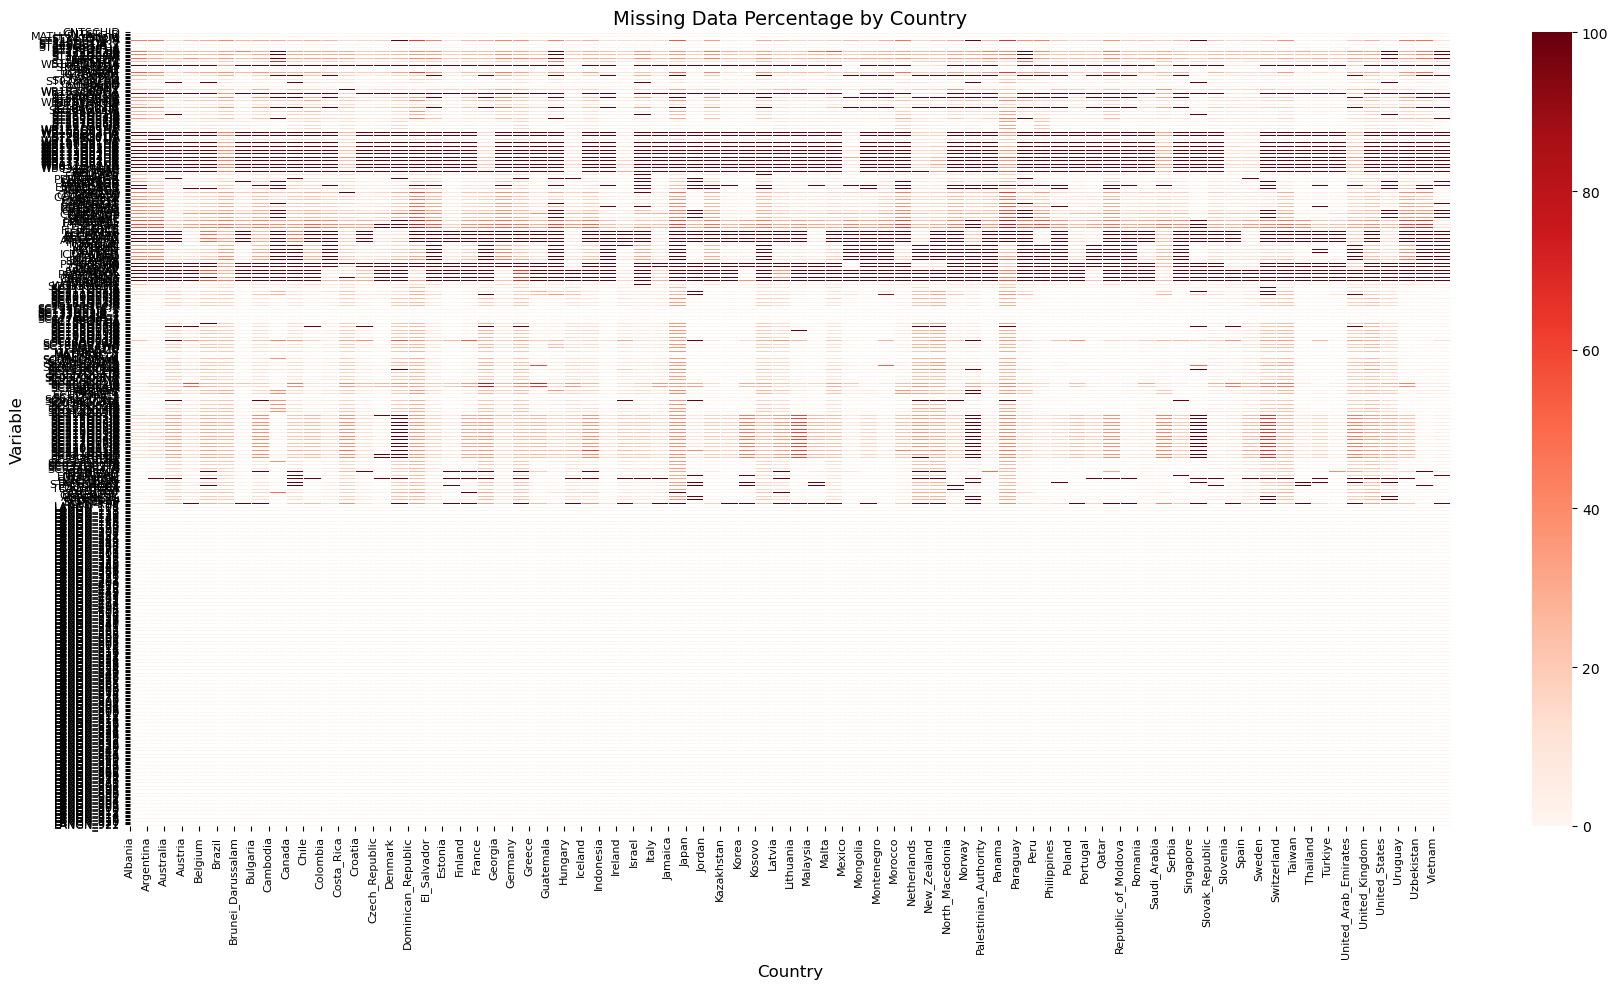

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap
plt.figure(figsize=(18, 10))  # Increase figure size for better readability

ax = sns.heatmap(
    missing_by_country, 
    cmap="Reds", 
    annot=False, 
    linewidths=0.5, 
    cbar=True, 
    vmin=0, vmax=100
)

# Ensure all variables (y-axis) are displayed
ax.set_yticks(range(len(missing_by_country.index)))  # Set tick positions
ax.set_yticklabels(missing_by_country.index, fontsize=8)  # Adjust font size

# Ensure all countries (x-axis) are displayed
ax.set_xticks(range(len(missing_by_country.columns)))  # Set tick positions
ax.set_xticklabels(missing_by_country.columns, fontsize=8, rotation=90)  # Rotate labels for readability

# Formatting
plt.title("Missing Data Percentage by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Variable", fontsize=12)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()


In [12]:
# Find variables where more than 30% of values are missing globally
missing_threshold = 30  # Percentage threshold
variables_to_exclude = missing_by_country[missing_by_country.mean(axis=1) > missing_threshold].index.tolist()

# Print the variables with descriptions
print("🚨 Variables recommended for exclusion due to high missing rates:")
for var in variables_to_exclude:
    description = field_description_lookup.get(var, "No description available")  # Lookup description or fallback
    print(f"- {var} {description}")

🚨 Variables recommended for exclusion due to high missing rates:
- ST350Q01JA During COVID closures, how much learned compared to typical week of in person school?
- ST356Q01JA Overall, how prepared feel for learning on own if school building closed again for extended period the future?
- ST322Q01JA How often: I turn off notifications from social networks and apps on my [digital devices] during class.
- ST322Q02JA How often: I turn off notifications from social networks and apps on my [digital devices] when I go to sleep.
- ST322Q03JA How often: I keep my [digital device] near me to answer messages when I am home.
- ST322Q04JA How often:  I have my [digital device] open in class so I can take notes or search for information.
- ST322Q06JA How often: I feel pressured to be online and answer messages when I am in class.
- ST322Q07JA How often:  I feel nervous/anxious when I don't have my [digital device] near me.
- WB164Q01HA How often do you worry about how much money your family has?
- 

In [13]:
# Find variables where more than 30% of values are missing globally
missing_threshold = 30  # Percentage threshold
variables_to_exclude = missing_by_country[missing_by_country.mean(axis=1) > missing_threshold].index.tolist()

# Print the variables with descriptions
print("🚨 Variables recommended for exclusion due to high missing rates:")
for var in variables_to_exclude:
    description = field_description_lookup.get(var, "No description available")  # Lookup description or fallback
    print(f"- {var}")


🚨 Variables recommended for exclusion due to high missing rates:
- ST350Q01JA
- ST356Q01JA
- ST322Q01JA
- ST322Q02JA
- ST322Q03JA
- ST322Q04JA
- ST322Q06JA
- ST322Q07JA
- WB164Q01HA
- ICTAVSCH
- ICTAVHOM
- ICTDISTR
- WB163Q06HA
- WB163Q07HA
- IC180Q01JA
- IC180Q08JA
- WB176Q01HA
- IC184Q01JA
- IC184Q02JA
- IC184Q03JA
- IC184Q04JA
- ST293Q04JA
- WB165Q01HA
- WB166Q01HA
- WB166Q02HA
- WB166Q03HA
- WB166Q04HA
- WB150Q01HA
- WB156Q01HA
- WB158Q01HA
- WB160Q01HA
- WB161Q01HA
- WB171Q01HA
- WB171Q02HA
- WB171Q03HA
- WB171Q04HA
- WB172Q01HA
- WB173Q01HA
- WB173Q02HA
- WB173Q03HA
- WB173Q04HA
- WB177Q01HA
- WB177Q02HA
- WB177Q03HA
- WB177Q04HA
- WB032Q01NA
- WB032Q02NA
- WB031Q01NA
- STUBMI
- PERSEVAGR
- COOPAGR
- EMPATAGR
- ASSERAGR
- STRESAGR
- EMOCOAGR
- INFOSEEK
- FAMCON
- CREATAS
- CREATOOS
- IMAGINE
- SCHSUST
- LEARRES
- PROBSELF
- FAMSUPSL
- FEELLAH
- SDLEFF
- ICTRES
- FLSCHOOL
- FLMULTSB
- FLFAMILY
- ACCESSFP
- FLCONFIN
- FLCONICT
- ACCESSFA
- ATTCONFM
- FRINFLFM
- ICTSCH
- ICTHOME
- I

In [14]:
# Calculate the percentage of missing data per country
missing_percentage = missing_by_country.mean(axis=0)  # Mean missing percentage per country
data_completeness = 100 - missing_percentage  # Convert to completeness

# Sort countries by completeness
data_completeness_sorted = data_completeness.sort_values(ascending=False)

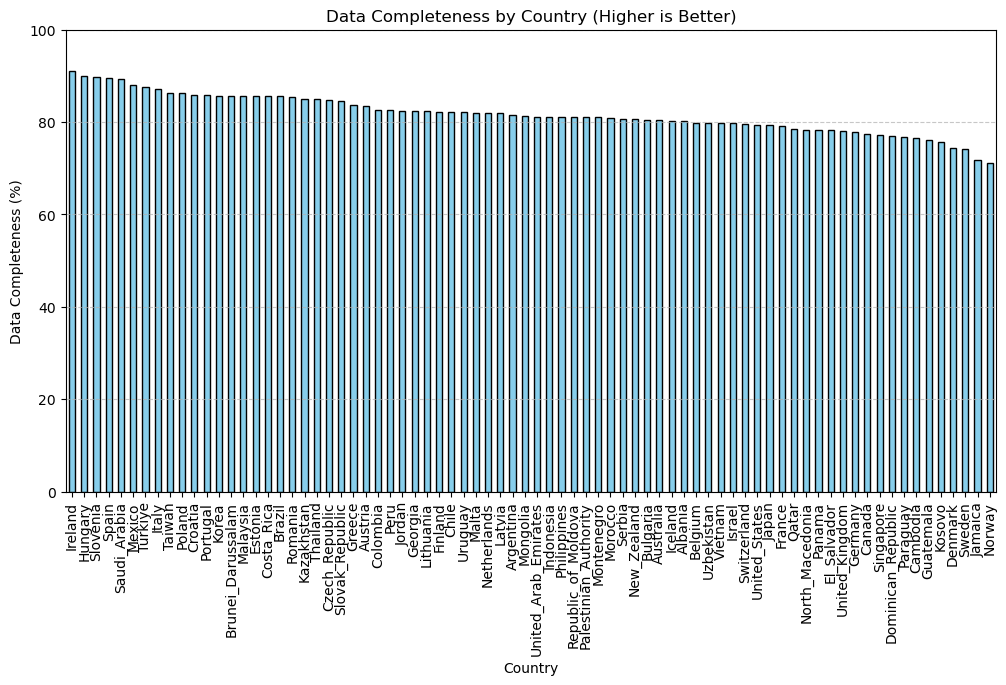

In [15]:
import matplotlib.pyplot as plt

# Plot the data completeness per country
plt.figure(figsize=(12, 6))
data_completeness_sorted.plot(kind="bar", color="skyblue", edgecolor="black")

# Formatting
plt.xlabel("Country")
plt.ylabel("Data Completeness (%)")
plt.title("Data Completeness by Country (Higher is Better)")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.ylim(0, 100)  # Ensure scale is from 0% to 100%
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [16]:
# Calculate the percentage of missing values per country
missing_percentage_by_country = missing_by_country.mean(axis=0)  # Mean missing % per country

# Filter countries where the missing percentage is <= 30%
countries_with_most_complete_data = missing_percentage_by_country[missing_percentage_by_country <= 35].index.tolist()

# Print the countries with the most complete data
print("🌍 Countries with the most complete data (≤ 30% missing across all variables):")
for country in countries_with_most_complete_data:
    print(f"- {country}")

🌍 Countries with the most complete data (≤ 30% missing across all variables):
- Albania
- Argentina
- Australia
- Austria
- Belgium
- Brazil
- Brunei_Darussalam
- Bulgaria
- Cambodia
- Canada
- Chile
- Colombia
- Costa_Rica
- Croatia
- Czech_Republic
- Denmark
- Dominican_Republic
- El_Salvador
- Estonia
- Finland
- France
- Georgia
- Germany
- Greece
- Guatemala
- Hungary
- Iceland
- Indonesia
- Ireland
- Israel
- Italy
- Jamaica
- Japan
- Jordan
- Kazakhstan
- Korea
- Kosovo
- Latvia
- Lithuania
- Malaysia
- Malta
- Mexico
- Mongolia
- Montenegro
- Morocco
- Netherlands
- New_Zealand
- North_Macedonia
- Norway
- Palestinian_Authority
- Panama
- Paraguay
- Peru
- Philippines
- Poland
- Portugal
- Qatar
- Republic_of_Moldova
- Romania
- Saudi_Arabia
- Serbia
- Singapore
- Slovak_Republic
- Slovenia
- Spain
- Sweden
- Switzerland
- Taiwan
- Thailand
- Türkiye
- United_Arab_Emirates
- United_Kingdom
- United_States
- Uruguay
- Uzbekistan
- Vietnam


In [17]:
# Calculate the percentage of missing data per country
missing_percentage = missing_by_country.mean(axis=0)  # Mean missing percentage per country
data_completeness = 100 - missing_percentage  # Convert to completeness

# Sort countries by completeness
data_completeness_sorted = data_completeness.sort_values(ascending=False)
data_completeness_sorted

CNT
Ireland         91.056031
Hungary         90.001905
Slovenia        89.780660
Spain           89.447630
Saudi_Arabia    89.383622
                  ...    
Kosovo          75.682831
Denmark         74.374823
Sweden          74.098342
Jamaica         71.774263
Norway          71.092143
Length: 76, dtype: float64

In [18]:
# Function to get memory usage of all DataFrames in the current notebook session
def get_dataframe_memory_usage():
    df_memory_usage = {}
    
    for var_name in globals():
        var_value = globals()[var_name]
        
        if isinstance(var_value, pd.DataFrame):
            memory_usage = var_value.memory_usage(deep=True).sum() / (1024 ** 2)  # Convert bytes to MB
            df_memory_usage[var_name] = memory_usage
    
    # Convert to DataFrame for better readability
    df_memory_usage_df = pd.DataFrame(list(df_memory_usage.items()), columns=["DataFrame", "Memory (MB)"])
    df_memory_usage_df = df_memory_usage_df.sort_values(by="Memory (MB)", ascending=False)
    
    return df_memory_usage_df

# Get the memory usage of all DataFrames
df_memory_usage_report = get_dataframe_memory_usage()

df_memory_usage_report

,DataFrame,Memory (MB)
0,df,2606.713855
5,missing_by_country,0.381500
2,df_metadata,0.249718
1,_2,0.022137
3,invalid_df,0.001854
4,value_counts_table,0.000263


In [19]:

# Check for missing values
#print("\nMissing Values:")
#print(df.isnull().sum())

# Memory friendly numeric column selection (Kernel always crashed before)
numeric_cols = []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numeric_cols.append(col)


In [20]:
def check_numeric_columns_for_strings_with_samples(df, sample_size=5):
    """
    Checks numeric columns of type 'object' for string values and prints samples if found.
    """
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].apply(lambda x: isinstance(x, str)).any():
            print(f"🚨 Mixed types found in column: {col}")
            mixed_samples = df.loc[df[col].apply(lambda x: isinstance(x, str)), col].sample(min(sample_size, len(df)), random_state=42)
            print("Sample of non-numeric values:")
            print(mixed_samples.to_list())
        else:
            print(f"✅ No mixed types found in column: {col}")

# Example usage:
check_numeric_columns_for_strings_with_samples(df, sample_size=5)

🚨 Mixed types found in column: CNT
Sample of non-numeric values:
['Morocco', 'United_Arab_Emirates', 'Canada', 'Philippines', 'Belgium']


# Data Sanity Checks

In [21]:
zero_variance = df.nunique()[df.nunique() == 1]
print("Zero Variance Columns:", zero_variance)

Zero Variance Columns: Series([], dtype: int64)


In [22]:
def check_mixed_types_random_columns(df, num_columns=5):
    """
    Checks for mixed data types in a random sample of columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to check.
    num_columns (int): Number of random columns to check.

    Returns:
    None
    """
    sampled_columns = np.random.choice(df.columns, size=min(num_columns, len(df.columns)), replace=False)
    
    for col in sampled_columns:
        mixed_types = df[col].apply(lambda x: not isinstance(x, (int, float, np.number)))
        if mixed_types.any():
            print(f"Column '{col}' has mixed types:")
            print(df.loc[mixed_types, col].unique())
        else:
            print(f"Column '{col}' has no mixed types.")

# Example usage:
check_mixed_types_random_columns(df, num_columns=5)

Column 'CREATOR' has no mixed types.
Column 'HOMEPOS' has no mixed types.
Column 'LANGN_828' has no mixed types.
Column 'LANGN_369' has no mixed types.
Column 'BMMJ1' has no mixed types.


In [23]:
df.shape

(591857, 570)

/tmp/ipykernel_3145/3853974632.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_corr = df.groupby('CNT').apply(lambda x: x[explanatory_vars].corrwith(x['MATH_Proficient']))


✅ Correlation results saved to 'v3.0-country_correlation_results.csv'


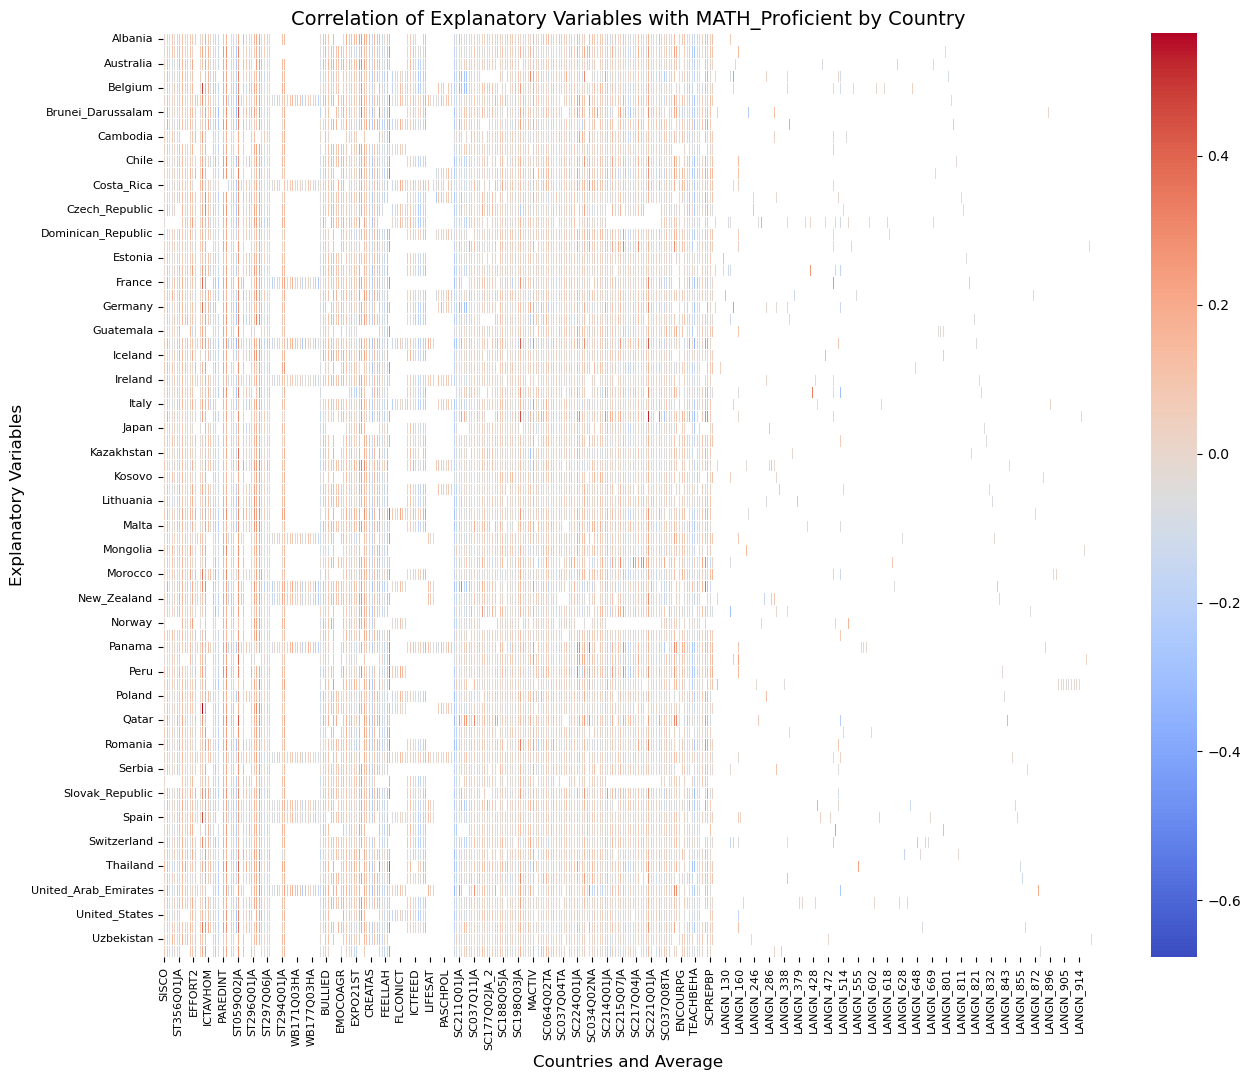

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    # Exclude non-explanatory variables
    exclude_columns = ['CNT', 'CNTSCHID', 'CNTSTUID', 'MATH_Proficient']
    explanatory_vars = [col for col in numeric_cols if col not in exclude_columns]
    
    country_corr = df.groupby('CNT').apply(lambda x: x[explanatory_vars].corrwith(x['MATH_Proficient']))
    
    # Add a column for the average correlation across countries
    country_corr['Average'] = country_corr.mean(axis=1)
    
    country_corr.to_csv('v3.0-country_correlation_results.csv', index=True)
    print("✅ Correlation results saved to 'v3.0-country_correlation_results.csv'")
    
    # Plot heatmap
    plt.figure(figsize=(15, 12))
    sns.heatmap(country_corr, cmap='coolwarm', annot=False, linewidths=0.5)
    
    plt.title("Correlation of Explanatory Variables with MATH_Proficient by Country", fontsize=14)
    plt.xlabel("Countries and Average", fontsize=12)
    plt.ylabel("Explanatory Variables", fontsize=12)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    
    plt.show()


# Solving for Simpsons Paradox!

In [ ]:
%%time

local_matrix = 'v3.0-average_correlation_df.csv'
# Check if the file exists locally
if os.path.exists(local_matrix):
    print("📂 Loading data from local file...")
    df = pd.read_csv(local_matrix, usecols=None)
else:
    # List to store per-country correlation matrices
    country_correlation_matrices = []
    
    # Compute correlation matrices for each country
    for country, group in df.groupby("CNT"):
        country_corr_matrix = group[numeric_cols].corr()  # Full correlation matrix
        country_correlation_matrices.append(country_corr_matrix)
    
    # Convert list to 3D numpy array (stacking matrices)
    correlation_tensor = np.stack([df.values for df in country_correlation_matrices], axis=2)
    
    # Compute the mean correlation across countries (element-wise)
    average_correlation_matrix = np.nanmean(correlation_tensor, axis=2)  # Averaging along country axis
    
    # Convert back to a DataFrame
    average_correlation_df = pd.DataFrame(average_correlation_matrix, index=numeric_cols, columns=numeric_cols)
    # Write it out for next time to save us 7 minutes
    average_correlation_df.to_csv(local_matrix)

In [39]:
average_correlation_df.shape

(569, 569)

# Test Code

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt

# Exclude non-explanatory variables
exclude_columns = ['CNT', 'CNTSCHID', 'CNTSTUID', 'MATH_Proficient']
explanatory_vars = [col for col in numeric_cols if col not in exclude_columns]

# Calculate correlations with MATH_Proficient
correlations = df_cleaned[explanatory_vars].corrwith(df_cleaned['MATH_Proficient'])

def plot_correlation_threshold(threshold=0.1):
    selected_features = correlations[correlations.abs() > threshold]
    plt.figure(figsize=(12, 8))
    selected_features.sort_values(ascending=False).plot(kind='barh', color='skyblue')
    plt.title(f'Selected Features with Correlation > {threshold}')
    plt.xlabel('Correlation with MATH_Proficient')
    plt.ylabel('Features')
    plt.gca().invert_yaxis()
    plt.show()
    return selected_features

# Interactive slider for threshold selection
interact(plot_correlation_threshold, threshold=widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.1, description="Threshold"))



# Load or Perform Regular Correlation (ONLY against MATH_Proficient)

In [49]:
%%time

# Plot correlation heatmap only for numeric variables
plt.figure(figsize=(20, 20))

local_matrix_orig = 'v3.0-correlation_matrix.csv'
# Check if the file exists locally
if os.path.exists(local_matrix_orig):
    print("📂 Loading data from local file...")
    correlation_matrix = pd.read_csv(local_matrix_orig, usecols=None)
else:
    # Exclude non-explanatory variables
    exclude_columns = ['CNT', 'CNTSCHID', 'CNTSTUID', 'MATH_Proficient']
    explanatory_vars = [col for col in numeric_cols if col not in exclude_columns]
    
    # Calculate correlations with MATH_Proficient
    correlation_matrix = df[explanatory_vars].corrwith(df['MATH_Proficient'])
    correlation_matrix.to_csv(local_matrix_orig)

CPU times: user 110 ms, sys: 16 μs, total: 110 ms
Wall time: 108 ms


<Figure size 2000x2000 with 0 Axes>

In [60]:
%%time

# Plot correlation heatmap only for numeric variables
plt.figure(figsize=(20, 20))

local_matrix_orig = 'v3.0-correlation_matrix.csv'
# Check if the file exists locally
if os.path.exists(local_matrix_orig):
    print("📂 Loading data from local file...")
    correlation_matrix = pd.read_csv(local_matrix_orig, usecols=None)
else:
   # Exclude non-explanatory variables
    exclude_columns = ['CNT', 'CNTSCHID', 'CNTSTUID']
    explanatory_vars = [col for col in df.select_dtypes(include=['number']).columns if col not in exclude_columns]
    # Calculate the correlation matrix including MATH_Proficient
    correlation_matrix = df[explanatory_vars + ['MATH_Proficient']].corr()
    correlation_matrix.to_csv(local_matrix_orig)

CPU times: user 741 ms, sys: 16 ms, total: 757 ms
Wall time: 756 ms


<Figure size 2000x2000 with 0 Axes>

# TEST - Original Correlation (Not Averaging By Country)

In [62]:
%%time

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

def plot_heatmap_with_threshold(threshold=0.0):
    filtered_corr = correlation_matrix.copy()

    # Apply threshold across entire DataFrame
    filtered_corr = filtered_corr.where(filtered_corr.abs() >= threshold, np.nan)  # Replace values below threshold with NaN

    plt.figure(figsize=(20, 20))
    sns.heatmap(filtered_corr, cmap='Blues', annot=False, linewidths=0.5)
    plt.title(f"Feature Correlation Heatmap (Threshold > {threshold})", fontsize=14)
    plt.xticks(fontsize=8, rotation=90)
    plt.yticks(fontsize=8, rotation=0)
    plt.show()



# Interactive slider for threshold selection
interact(plot_heatmap_with_threshold, threshold=widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.1, description="Threshold"))


interactive(children=(FloatSlider(value=0.1, description='Threshold', max=1.0, step=0.01), Output()), _dom_cla…

CPU times: user 2.86 s, sys: 36 ms, total: 2.89 s
Wall time: 2.89 s


<function __main__.plot_heatmap_with_threshold(threshold=0.0)>

# Now Averaging By Country

In [67]:
%%time

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

def plot_heatmap_with_threshold(threshold=0.0):
    filtered_corr = average_correlation_df.copy()

    # Apply threshold across entire DataFrame
    filtered_corr = filtered_corr.where(filtered_corr.abs() >= threshold, np.nan)  # Replace values below threshold with NaN

    plt.figure(figsize=(20, 20))
    sns.heatmap(filtered_corr, cmap='Blues', annot=False, linewidths=0.5)
    plt.title(f"Feature Correlation Heatmap (Threshold > {threshold})", fontsize=14)
    plt.xticks(fontsize=8, rotation=90)
    plt.yticks(fontsize=8, rotation=0)
    plt.show()



# Interactive slider for threshold selection
interact(plot_heatmap_with_threshold, threshold=widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.1, description="Threshold"))


interactive(children=(FloatSlider(value=0.1, description='Threshold', max=1.0, step=0.01), Output()), _dom_cla…

CPU times: user 3.1 s, sys: 52 ms, total: 3.15 s
Wall time: 3.15 s


<function __main__.plot_heatmap_with_threshold(threshold=0.0)>

# Without Averaging - Top Negative Correlations


Top Negative Correlations with MATH_Proficient:
SC211Q03JA                                                                                                                          -0.678894
Grade repetition                                                                                                                    -0.647403
In the past 30 days, how often did you not eat because there was not enough money to buy food?                                      -0.628646
In last 3 years, did school close because: For another reason (e.g. a natural disaster, strikes or demonstrations, air pollution)   -0.619379
Working for pay before or after school                                                                                              -0.612208
How did you feel the last time you spent time outside your home with your friends: Bored                                            -0.576463
LANGN_607                                                                                          

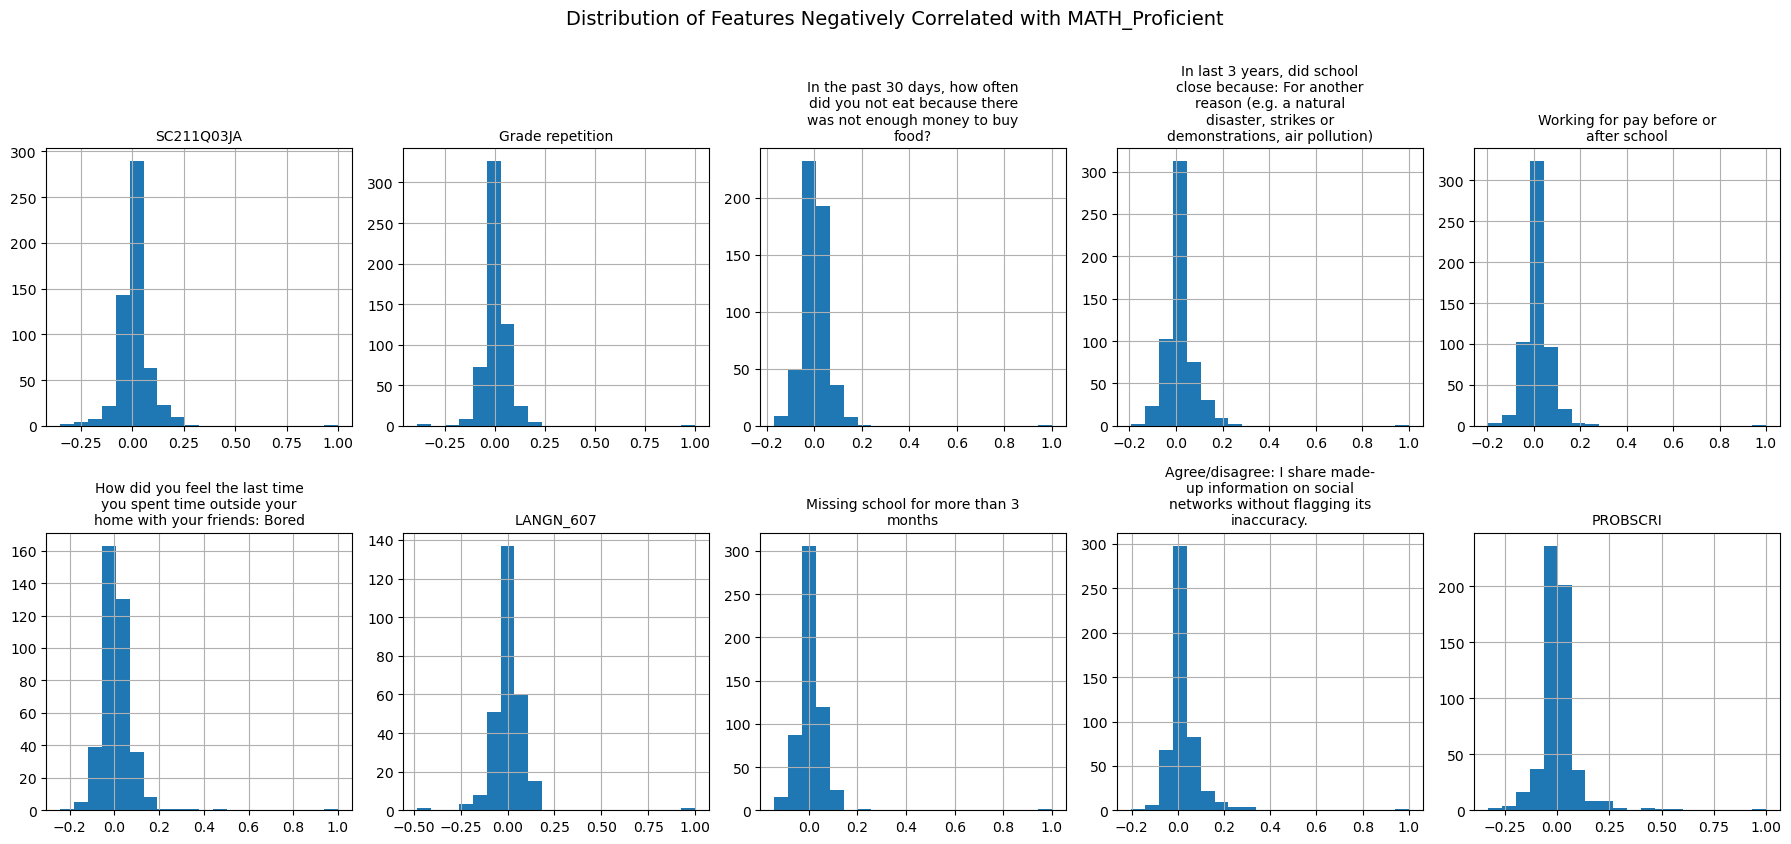

CPU times: user 2.01 s, sys: 16 ms, total: 2.03 s
Wall time: 2.02 s


In [68]:
%%time

import textwrap

# Analyze correlation with MATH_Proficient
correlations = df[numeric_cols].corr()["MATH_Proficient"].sort_values()

# Replace field codes with descriptions for display
correlations_named = correlations.rename(index=lambda x: field_description_lookup.get(x, x))

# Print Top Negative Correlations with Descriptions
print("\nTop Negative Correlations with MATH_Proficient:")
print(correlations_named.head(10))

# Get top 10 negatively correlated features
top_negative = correlations.head(10).index  # Keep original field IDs for selecting data

# Create a mapping for renaming columns in the plot
renamed_columns = {col: field_description_lookup.get(col, col) for col in top_negative}

# Create histograms with wrapped text
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))  # Adjust grid size for spacing
axes = axes.flatten()  # Flatten 2D array of axes to iterate easily

for i, col in enumerate(top_negative):
    ax = axes[i]
    df[col].hist(ax=ax, bins=20)

    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(renamed_columns.get(col, col), width=30))
    ax.set_title(wrapped_title, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Features Negatively Correlated with MATH_Proficient", fontsize=14, y=1.05)
plt.show()



# WITH Averaging - Top Negative Correlations


Top Negative Correlations with MATH_Proficient:
LANGN_607                                                                                                                           -0.223044
SC211Q03JA                                                                                                                          -0.203288
LANGN_517                                                                                                                           -0.201780
Agree/disagree: I share made-up information on social networks without flagging its inaccuracy.                                     -0.196444
Working for pay before or after school                                                                                              -0.195086
In last 3 years, did school close because: For another reason (e.g. a natural disaster, strikes or demonstrations, air pollution)   -0.191659
Creative Activities outside of school (WLE)                                                        

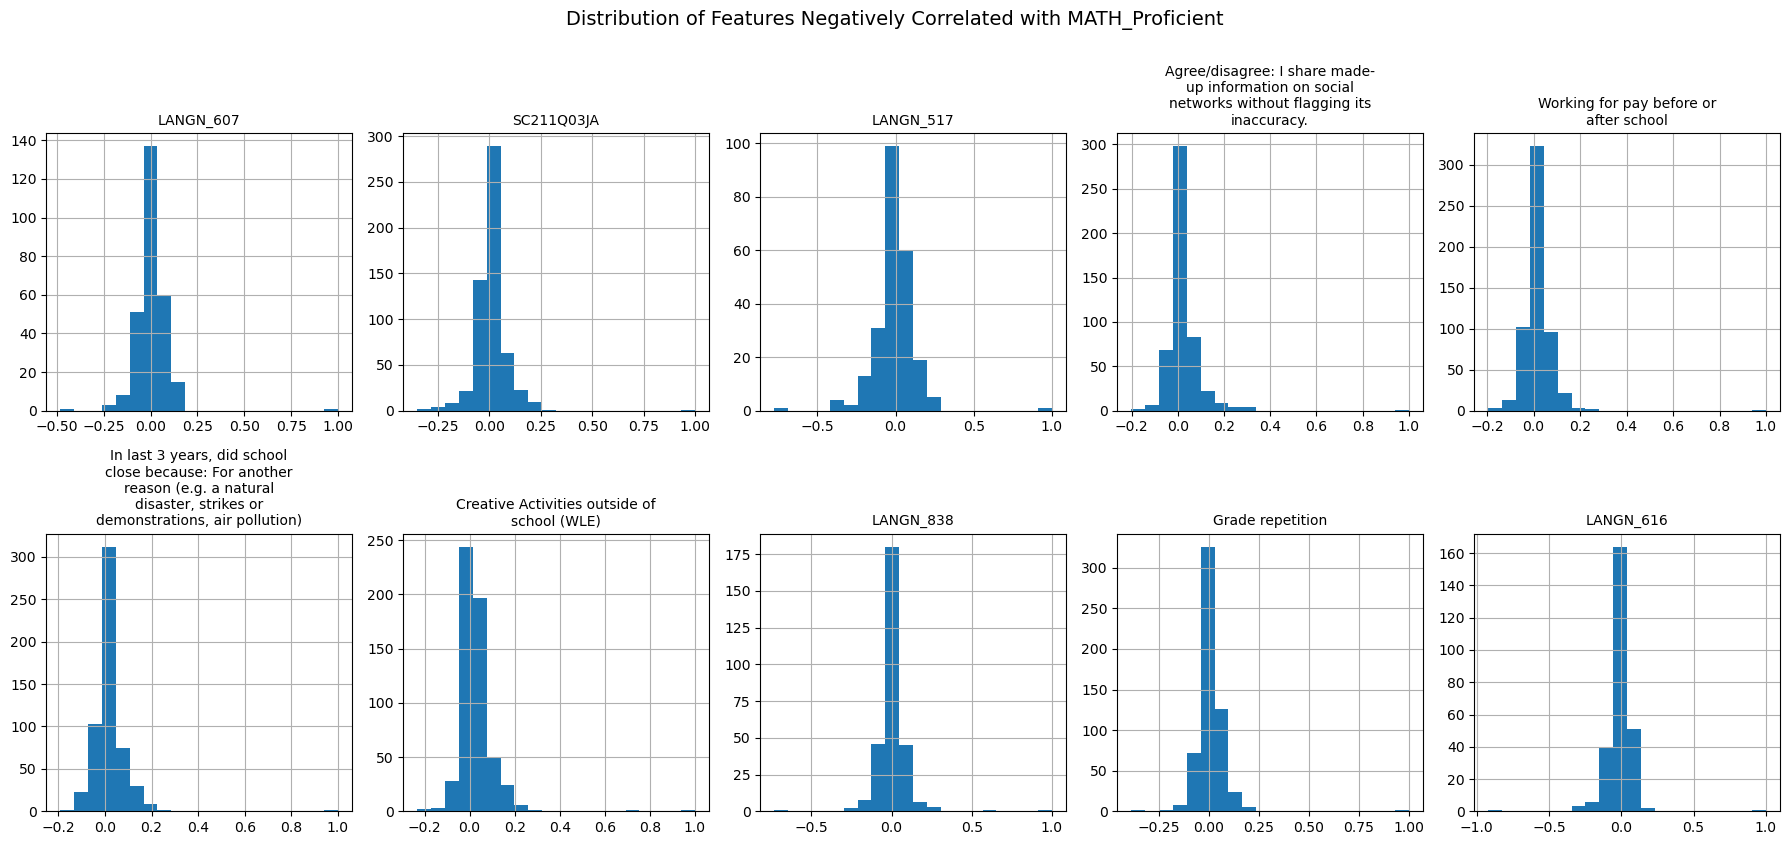

CPU times: user 1.33 s, sys: 31.9 ms, total: 1.36 s
Wall time: 1.36 s


In [69]:
%%time

import textwrap

# Analyze correlation with MATH_Proficient
correlations = average_correlation_df["MATH_Proficient"].sort_values()

# Replace field codes with descriptions for display
correlations_named = correlations.rename(index=lambda x: field_description_lookup.get(x, x))

# Print Top Negative Correlations with Descriptions
print("\nTop Negative Correlations with MATH_Proficient:")
print(correlations_named.head(10))

# Get top 10 negatively correlated features
top_negative = correlations.head(10).index  # Keep original field IDs for selecting data

# Create a mapping for renaming columns in the plot
renamed_columns = {col: field_description_lookup.get(col, col) for col in top_negative}

# Create histograms with wrapped text
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))  # Adjust grid size for spacing
axes = axes.flatten()  # Flatten 2D array of axes to iterate easily

for i, col in enumerate(top_negative):
    ax = axes[i]
    df[col].hist(ax=ax, bins=20)

    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(renamed_columns.get(col, col), width=30))
    ax.set_title(wrapped_title, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Features Negatively Correlated with MATH_Proficient", fontsize=14, y=1.05)
plt.show()


# Without Averaging - Top Positive Correlations


Top Positive Correlations with MATH_Proficient:
ICT Resources (WLE)                                                                 0.637083
ST349Q01JA_1                                                                        0.682339
Father’s occupational status (ISEI) based on 4-digit human coded ISCO               0.691688
Total number of [class periods] per week for all subjects, including mathematics    0.701342
Mother’s occupational status (ISEI) based on 4-digit human coded ISCO               0.702097
Home possessions (WLE)                                                              0.723421
Index of economic, social and cultural status                                       0.728973
MATH_Proficient                                                                     1.000000
Une Heure Option                                                                         NaN
OECD country                                                                             NaN
Name: MATH_Proficient

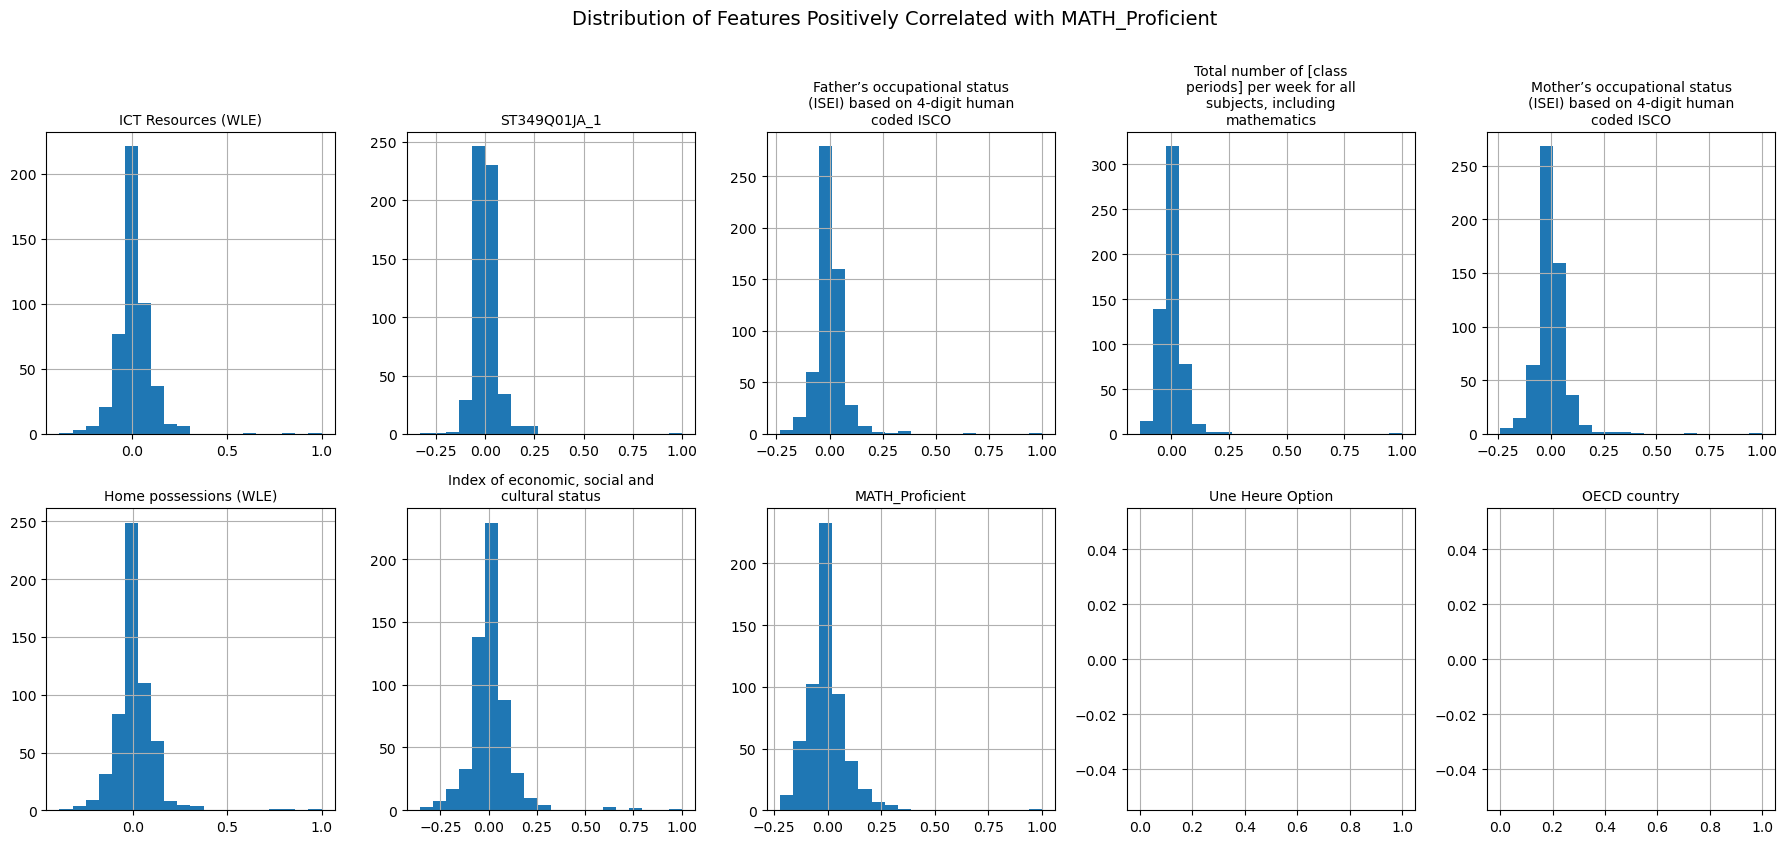

CPU times: user 1.48 s, sys: 16 ms, total: 1.5 s
Wall time: 1.5 s


In [70]:
%%time

import textwrap

# Analyze correlation with MATH_Proficient
correlations = df[numeric_cols].corr()["MATH_Proficient"].sort_values()

# Replace field codes with descriptions for display
correlations_named = correlations.rename(index=lambda x: field_description_lookup.get(x, x))

# Print Top Negative Correlations with Descriptions
print("\nTop Positive Correlations with MATH_Proficient:")
print(correlations_named.tail(10))

# Get top 10 positively correlated features
top_positive = correlations.tail(10).index  # Keep original field IDs for selecting data

# Create a mapping for renaming columns in the plot
renamed_columns = {col: field_description_lookup.get(col, col) for col in top_positive}

# Create histograms with wrapped text
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))  # Adjust grid size for spacing
axes = axes.flatten()  # Flatten 2D array of axes to iterate easily

for i, col in enumerate(top_positive):
    ax = axes[i]
    df[col].hist(ax=ax, bins=20)

    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(renamed_columns.get(col, col), width=30))
    ax.set_title(wrapped_title, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Features Positively Correlated with MATH_Proficient", fontsize=14, y=1.05)
plt.show()

# WITH Averaging - Top Positive Correlations


Top Positive Correlations with MATH_Proficient:
ICT Resources (WLE)                                                                                    0.240805
Total number of [class periods] per week for all subjects, including mathematics                       0.246727
Mathematics self-efficacy: formal and applied mathematics - response options reversed in 2022 (WLE)    0.286432
Home possessions (WLE)                                                                                 0.296850
Index of economic, social and cultural status                                                          0.302488
LANGN_422                                                                                              0.323646
LANGN_492                                                                                              0.336341
MATH_Proficient                                                                                        1.000000
Une Heure Option                                       

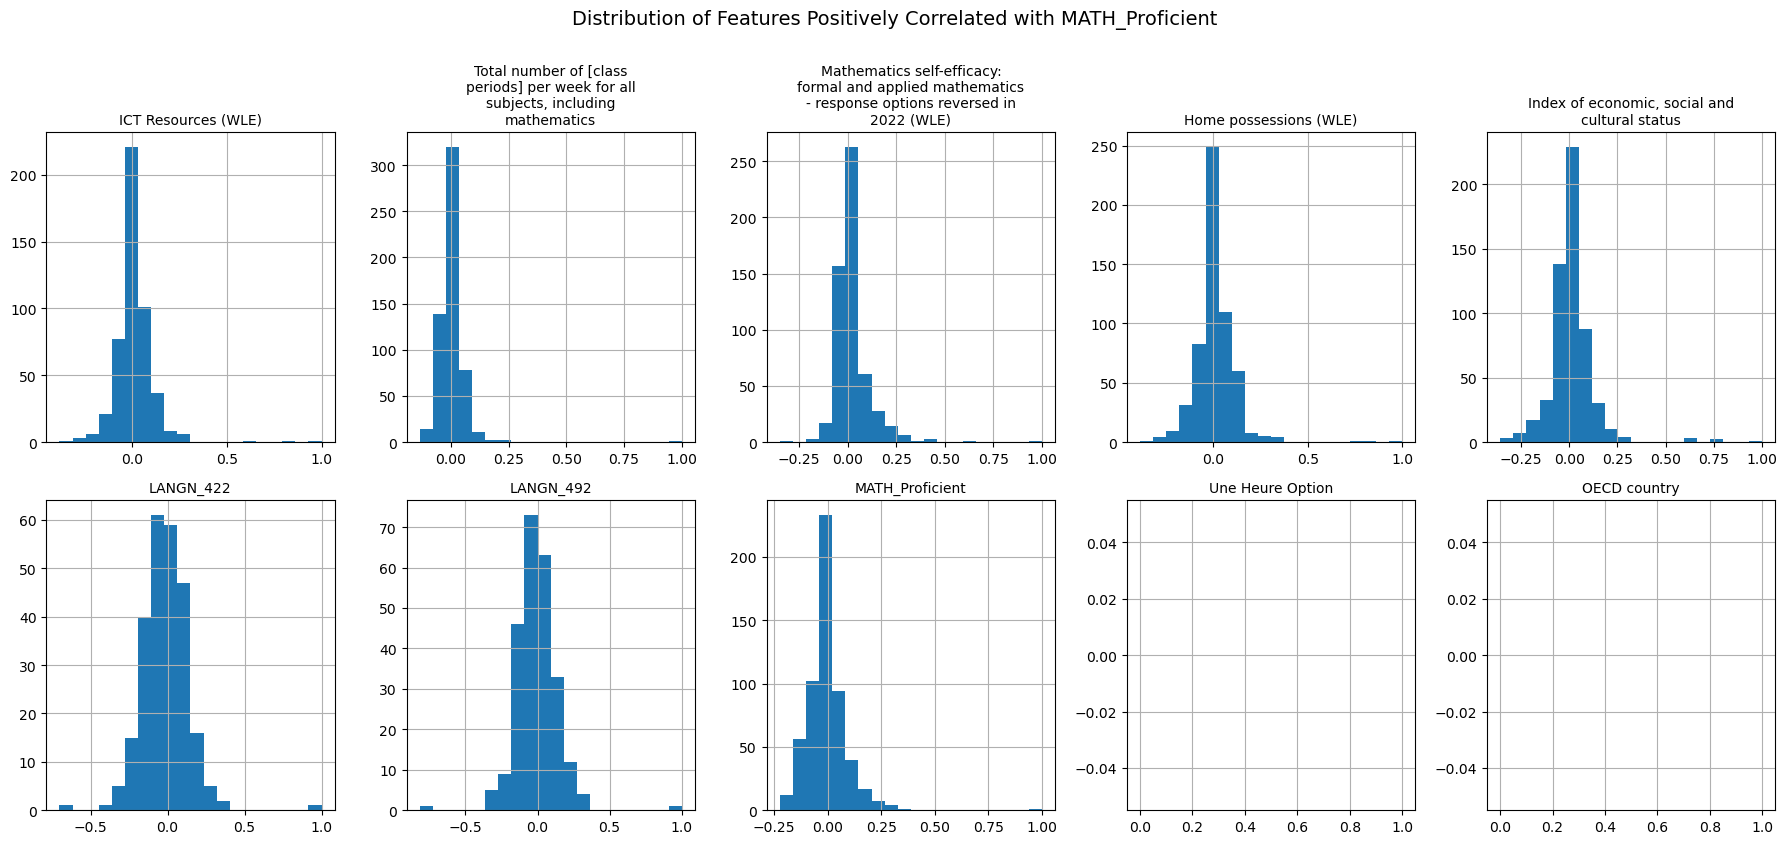

CPU times: user 1.23 s, sys: 16 ms, total: 1.24 s
Wall time: 1.24 s


In [71]:
%%time

import textwrap

# Analyze correlation with MATH_Proficient
correlations = average_correlation_df["MATH_Proficient"].sort_values()

# Replace field codes with descriptions for display
correlations_named = correlations.rename(index=lambda x: field_description_lookup.get(x, x))

# Print Top Negative Correlations with Descriptions
print("\nTop Positive Correlations with MATH_Proficient:")
print(correlations_named.tail(10))

# Get top 10 positively correlated features
top_positive = correlations.tail(10).index  # Keep original field IDs for selecting data

# Create a mapping for renaming columns in the plot
renamed_columns = {col: field_description_lookup.get(col, col) for col in top_positive}

# Create histograms with wrapped text
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))  # Adjust grid size for spacing
axes = axes.flatten()  # Flatten 2D array of axes to iterate easily

for i, col in enumerate(top_positive):
    ax = axes[i]
    df[col].hist(ax=ax, bins=20)

    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(renamed_columns.get(col, col), width=30))
    ax.set_title(wrapped_title, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Features Positively Correlated with MATH_Proficient", fontsize=14, y=1.05)
plt.show()

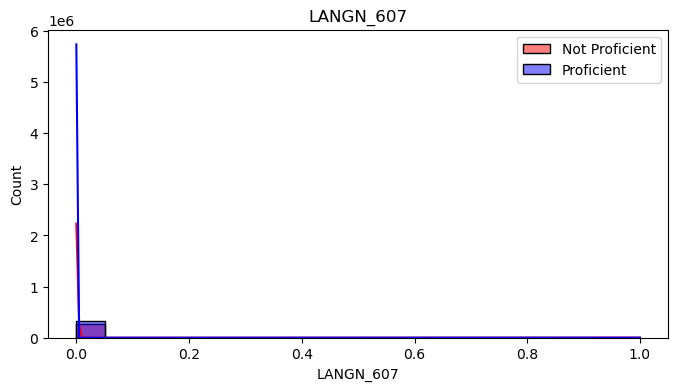

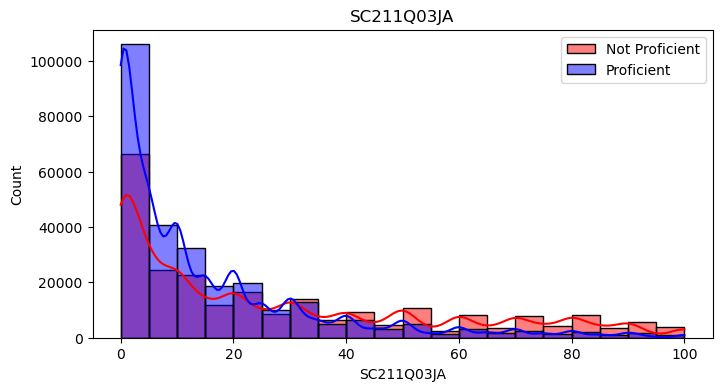

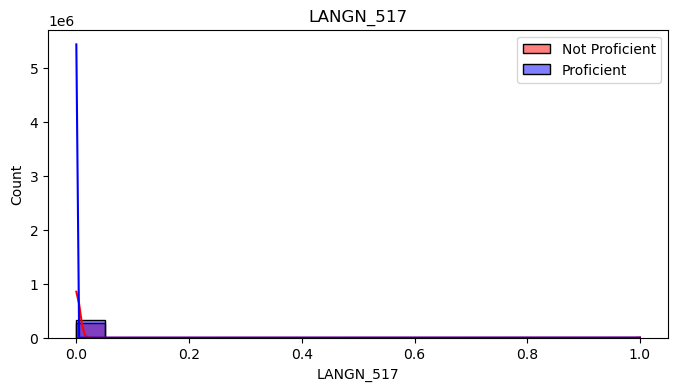

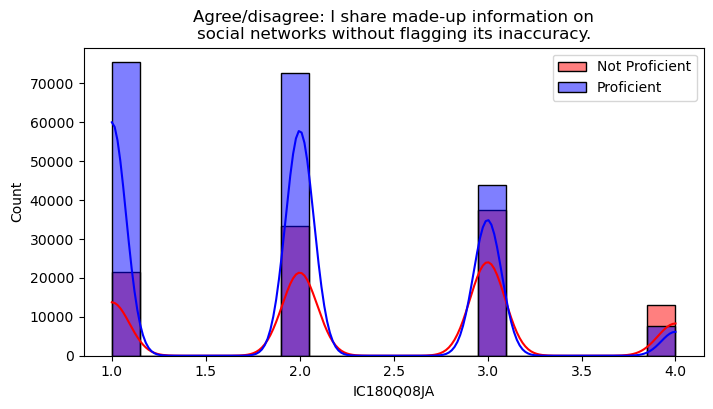

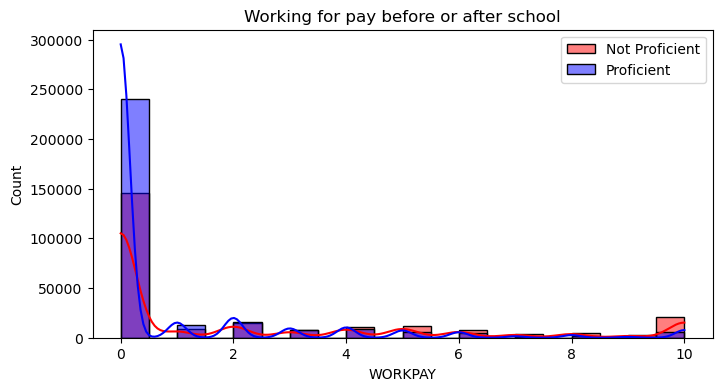

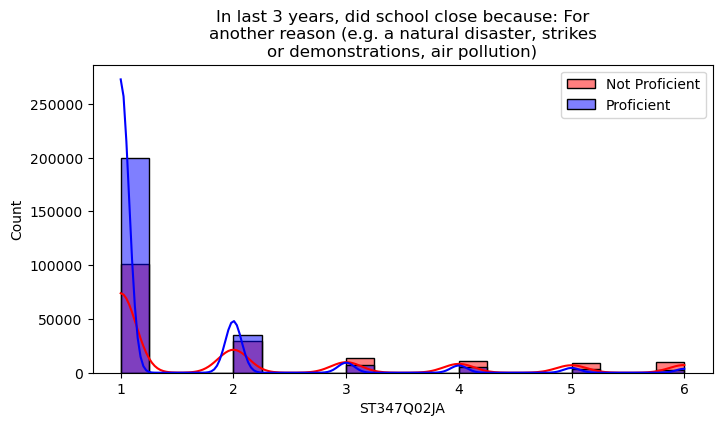

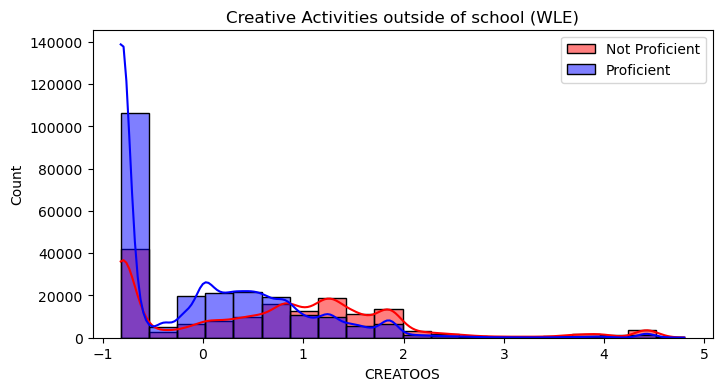

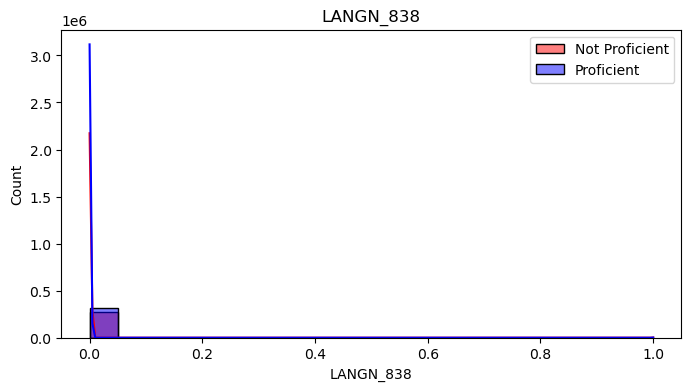

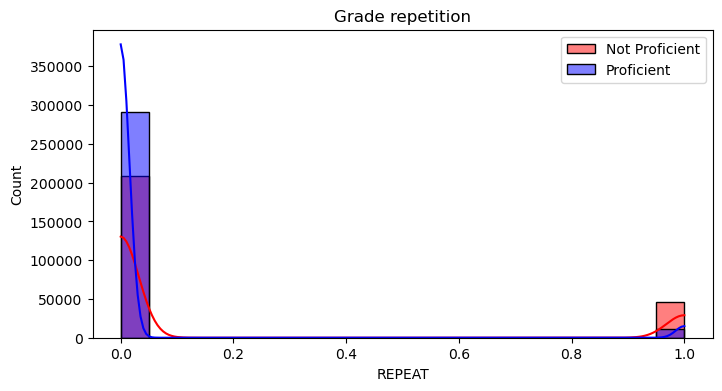

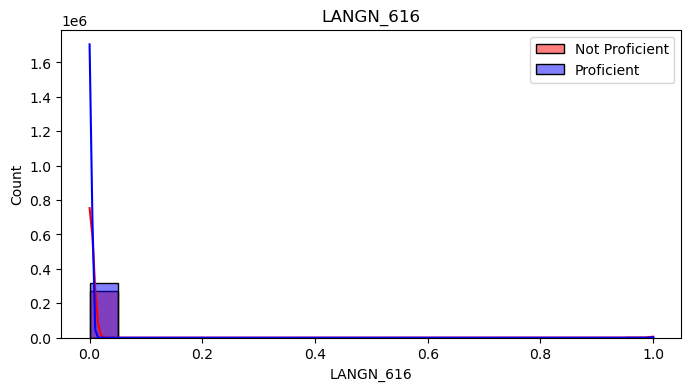

CPU times: user 35.1 s, sys: 4.44 s, total: 39.6 s
Wall time: 32.9 s


In [33]:
%%time

for col in top_negative:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[df["MATH_Proficient"] == 0][col], color="red", label="Not Proficient", kde=True, bins=20)
    sns.histplot(df[df["MATH_Proficient"] == 1][col], color="blue", label="Proficient", kde=True, bins=20)

    wrapped_title = "\n".join(textwrap.wrap(field_description_lookup.get(col, col), width=50))
    plt.title(wrapped_title)
    plt.legend()
    plt.show()

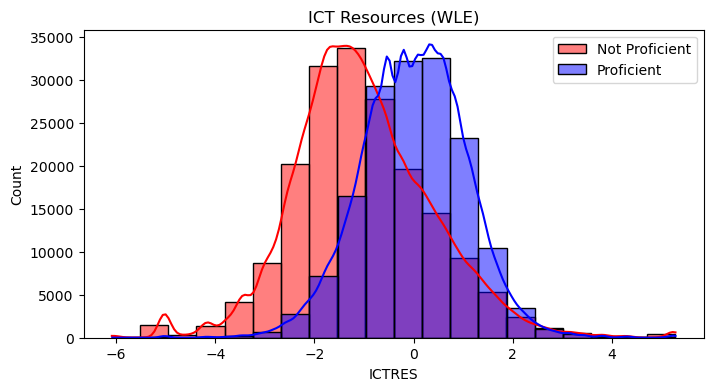

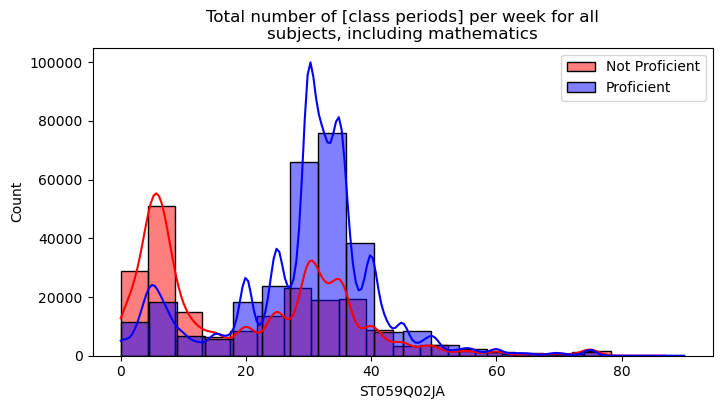

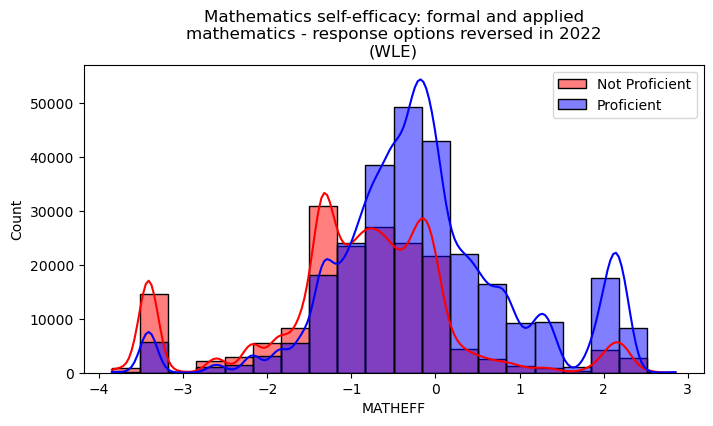

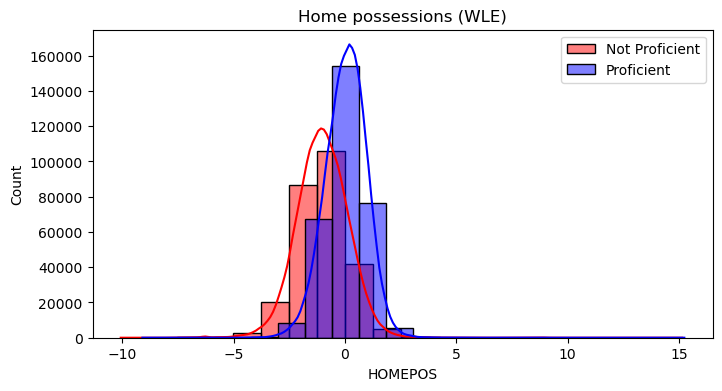

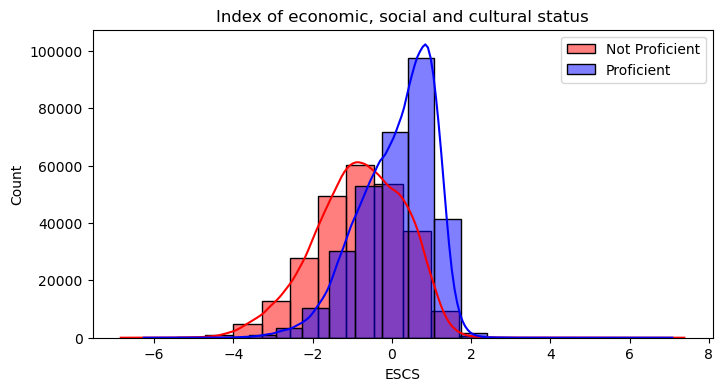

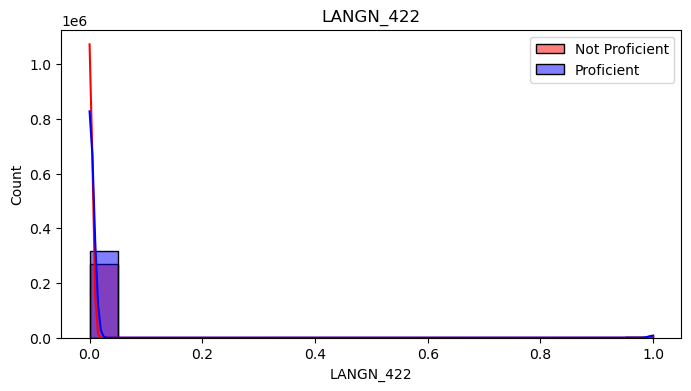

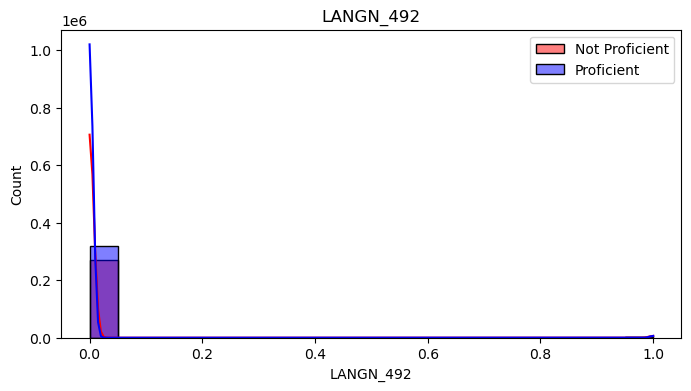

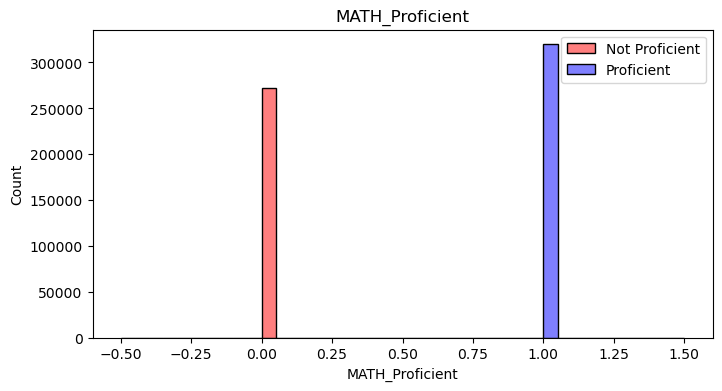

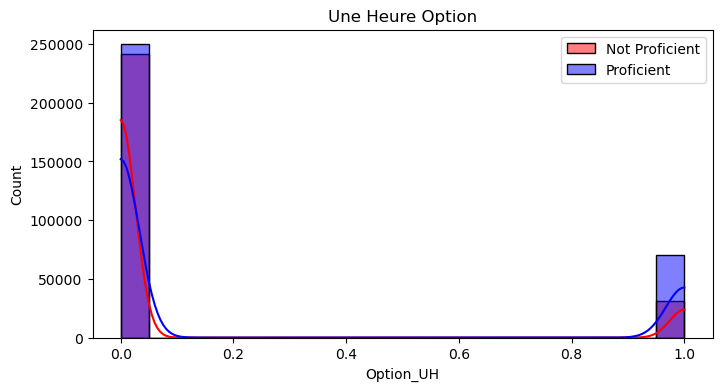

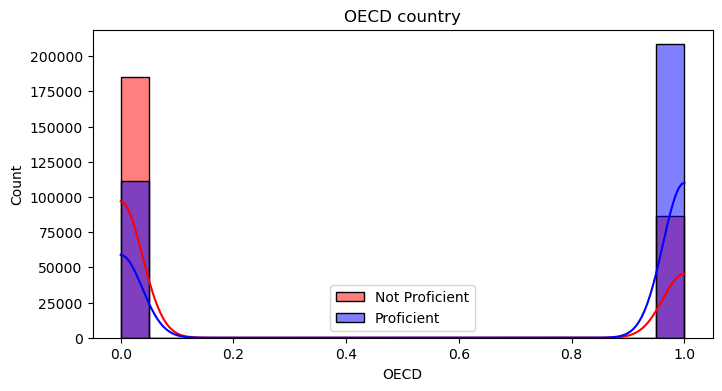

CPU times: user 33.7 s, sys: 4.56 s, total: 38.2 s
Wall time: 32.2 s


In [34]:
%%time

for col in top_positive:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[df["MATH_Proficient"] == 0][col], color="red", label="Not Proficient", kde=True, bins=20)
    sns.histplot(df[df["MATH_Proficient"] == 1][col], color="blue", label="Proficient", kde=True, bins=20)

    wrapped_title = "\n".join(textwrap.wrap(field_description_lookup.get(col, col), width=50))
    plt.title(wrapped_title)
    plt.legend()
    plt.show()